# Evaluation of TTA-Based Post-hoc Calibration Method

#### Import Bibliotheken

In [560]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

### Trained Models

In [562]:
df_10 = ["cifar10densenet121_20_1_1.csv","cifar10densenet169_20_1_1.csv", "cifar10resnet152_20_1_1.csv", "cifar10resnet18_20_1_1.csv", "cifar10resnet34_20_1_1.csv", "cifar10resnet50_20_1_1.csv", "cifar10vgg16_20_1_1.csv", "cifar10vgg19_20_1_1.csv"]
df_100 = ["cifar100densenet121_20_1_1.csv","cifar100densenet169_20_1_1.csv", "cifar100resnet152_20_1_1.csv", "cifar100resnet18_20_1_1.csv", "cifar100resnet34_20_1_1.csv", "cifar100resnet50_20_1_1.csv", "cifar100resnet101_20_1_1.csv", "cifar100vgg16_20_1_1.csv", "cifar100vgg19_20_1_1.csv"]
df_skin = ["skindensenet169_20_1_1.csv","skinresnet152_20_1_1.csv", "skinresnet18_20_1_1.csv", "skinresnet34_20_1_1.csv", "skinresnet50_20_1_1.csv", "skinresnet101_20_1_1.csv", "skinvgg16_20_1_1.csv", "skinvgg19_20_1_1.csv"]

#### Preparation of Datafram for Cifar-10

In [563]:
df_curr = df_10

df = pd.DataFrame()

for i in df_curr:
    df_part = pd.read_csv("csv/" + i)
    df = df.append(df_part)
df = df.reset_index()

df = df.reset_index()
df['calib'] = df['calib'].replace("ts", "TS")
df['calib'] = df['calib'].replace("ets", "ETS")
df['calib'] = df['calib'].replace("mir", "IRM")
df['calib'] = df['calib'].replace("irova", "IR")
df['calib'] = df['calib'].replace("irovats", "IR+TS")
df['calib'] = df['calib'].replace("None", "Base")

df = df[["model","dataset", "TestSet", "calib", "pertubed", "ttaugmented", "accuracy", "ece"]]
df.columns = ["model", "dataset", "Testset", "calib", "pertubed", "TTA", "accuracy", "ECE"]

for i in df.index:
    if df.loc[i,"pertubed"] == True:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P+TTA"
        else:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P"

    else:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+TTA"

df = df[["model","dataset", "Testset", "calib", "accuracy", "ECE"]]

df["severity"] = 0
df["severity"] = [int(x.split('_')[-1]) if x != "Base" else 0 for x in df.Testset.values]

df_10 = df

#### Preparation of Dataframe for Cifar 100

In [564]:
df_curr = df_100

df = pd.DataFrame()

for i in df_curr:
    df_part = pd.read_csv("csv/" + i)
    df = df.append(df_part)
df = df.reset_index()

df = df.reset_index()
df['calib'] = df['calib'].replace("ts", "TS")
df['calib'] = df['calib'].replace("ets", "ETS")
df['calib'] = df['calib'].replace("mir", "IRM")
df['calib'] = df['calib'].replace("irova", "IR")
df['calib'] = df['calib'].replace("irovats", "IR+TS")
df['calib'] = df['calib'].replace("None", "Base")

df = df[["model","dataset", "TestSet", "calib", "pertubed", "ttaugmented", "accuracy", "ece"]]
df.columns = ["model", "dataset", "Testset", "calib", "pertubed", "TTA", "accuracy", "ECE"]

for i in df.index:
    if df.loc[i,"pertubed"] == True:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P+TTA"
        else:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P"

    else:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+TTA"

df = df[["model","dataset", "Testset", "calib", "accuracy", "ECE"]]

df["severity"] = 0
df["severity"] = [int(x.split('_')[-1]) if x != "Base" else 0 for x in df.Testset.values]

df_100 = df

#### Preperation of Dataframe for Skin Images

In [565]:
df_curr = df_skin

df = pd.DataFrame()

for i in df_curr:
    df_part = pd.read_csv("csv/" + i)
    df = df.append(df_part)
df = df.reset_index()

df = df.reset_index()
df['calib'] = df['calib'].replace("ts", "TS")
df['calib'] = df['calib'].replace("ets", "ETS")
df['calib'] = df['calib'].replace("mir", "IRM")
df['calib'] = df['calib'].replace("irova", "IR")
df['calib'] = df['calib'].replace("irovats", "IR+TS")
df['calib'] = df['calib'].replace("None", "Base")
df['TestSet'] = df['TestSet'].replace("ID", "Hold-out")
df['TestSet'] = df['TestSet'].replace("MSK", "MSK1-4")
df['TestSet'] = df['TestSet'].replace("MSK2020", "New York")
df['TestSet'] = df['TestSet'].replace("Sidney", "Sydney")
    
df = df[["model","dataset", "TestSet", "calib", "pertubed", "ttaugmented", "accuracy", "ece"]]
df.columns = ["model", "dataset", "Testset", "calib", "pertubed", "TTA", "accuracy", "ECE"]

for i in df.index:
    if df.loc[i,"pertubed"] == True:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P+TTA"
        else:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+P"

    else:
        if df.loc[i,"TTA"] == True:
            df.loc[i,"calib"] = df.loc[i,"calib"] + "+TTA"

df = df[["model","dataset", "Testset", "calib", "accuracy", "ECE"]]
df_skin = df

#### TTA-based Extension of Post-hoc Calibration Methods on CIFAR-100

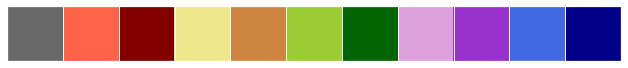

In [568]:
model_order = ["Base","TS","TS+TTA", "ETS","ETS+TTA", "IR","IR+TTA", "IRM", "IRM+TTA"]
tune_mode_order = ("Base","TS","TS+TTA", "ETS","ETS+TTA", "IR","IR+TTA", "IRM", "IRM+TTA")

sns.set_palette("Set2")

#colors = ["darkgrey", "dimgrey", "lightsalmon", "tomato", "indianred","maroon", "lightgreen","yellowgreen","forestgreen", "darkgreen","lightblue", "lightskyblue", "royalblue", "darkblue", "blue", "blue"]
colors = ["dimgrey", "tomato", "maroon", "khaki","peru", "yellowgreen","darkgreen", "plum", "darkorchid","royalblue", "darkblue"]
#, "#e31a1c","#fb9a99","#ff7f00","#fdbf6f","#33a02c","#b2df8a","#1f78b4","#a6cee3","#6a3d9a","#cab2d6","#7D7D7D","#9B9B9B","#B8A392"]#,"#b15928"]
#colors = colors[::-1]
color_dict = OrderedDict(zip(model_order, colors))
sns.palplot(colors)

In [569]:
df_10_curr = df_10.query("calib in ['Base','TS','TS+TTA', 'ETS','ETS+TTA','IR','IR+TTA', 'IRM','IRM+TTA']")
df_100_curr = df_100.query("calib in ['Base','TS','TS+TTA', 'ETS','ETS+TTA','IR','IR+TTA', 'IRM','IRM+TTA']")
df_skin_curr = df_skin.query("calib in ['Base','TS','TS+TTA', 'ETS','ETS+TTA','IR','IR+TTA', 'IRM','IRM+TTA']")

['Base', 'TS', 'TS+TTA', 'ETS', 'ETS+TTA', 'IR', 'IR+TTA', 'IRM', 'IRM+TTA']


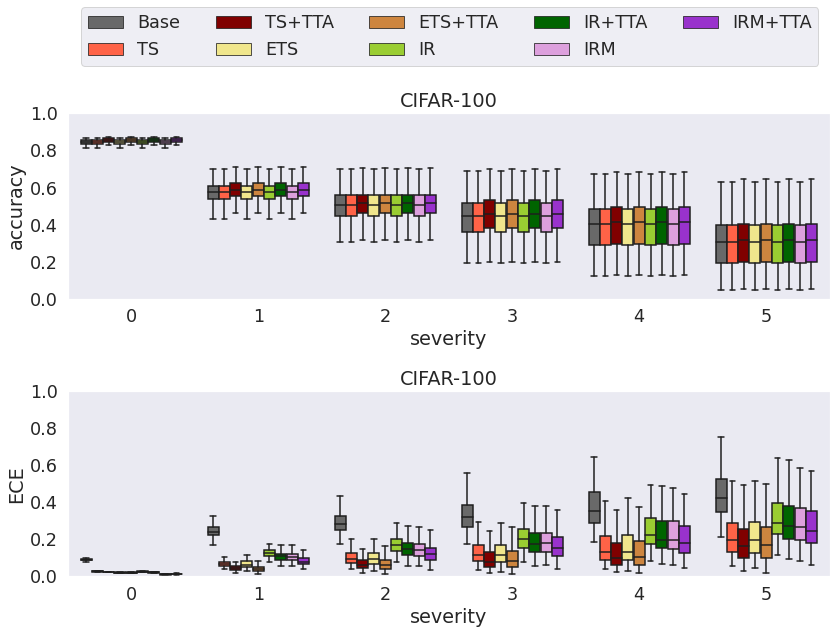

In [570]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].set_title("CIFAR-100")
axes[1].set_title("CIFAR-100")


axes[0].set_ylim([0.0,1.0])
axes[1].set_ylim([0.0,1.0])
    
with sns.axes_style("ticks"):
    ax = sns.boxplot(
        ax=axes[0],
        x="severity",
        y="accuracy",
        hue="calib",
        data=df_100_curr,
        hue_order=model_order,
        palette=color_dict,
        saturation=1.0,
        showfliers=False)
    ax.legend([],[], frameon=False)
    ax.grid(False)
    
with sns.axes_style("ticks"):
    ax = sns.boxplot(
        ax=axes[1],
        x="severity",
        y="ECE",
        hue="calib",
        data=df_100_curr,
        hue_order=model_order,
        palette=color_dict,
        saturation=1.0,
        showfliers=False)
    ax.legend([],[], frameon=False)
    ax.grid(False)
      
handles, labels = ax.get_legend_handles_labels()
print(labels)
fig.legend(handles, labels, loc='upper right',borderaxespad=0.1, ncol = 5, bbox_to_anchor=(0.965,1.115))
#axes.legend(loc="upper right", title="sex", title_fontsize="x-large")#axes.legend(h, l, facecolor='white', fontsize=17, bbox_to_anchor=(1.0,1.0))
fig.tight_layout()
plt.savefig("temp/ResultsCifar100.pdf",  bbox_inches="tight")

#### Extension of Post-hoc calibration Methods on Skin Images

['Base', 'TS', 'TS+TTA', 'ETS', 'ETS+TTA', 'IR', 'IR+TTA', 'IRM', 'IRM+TTA']


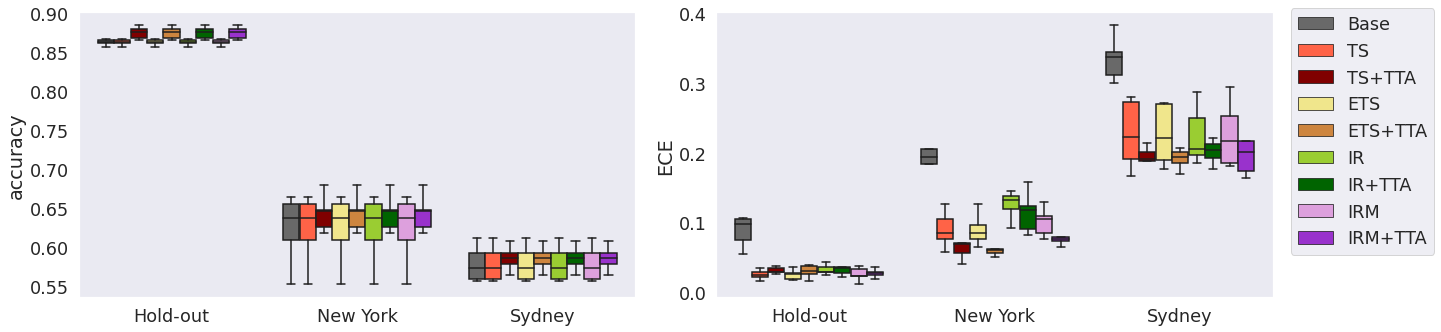

In [572]:
fig, axes = plt.subplots(1,2, figsize=(18,5))

with sns.axes_style("ticks"):
    ax = sns.boxplot(
        ax=axes[0],
        x="Testset",
        y="accuracy",
        hue="calib",
        data=df_skin_curr,
        order = ["Hold-out", "New York", "Sydney"],
        hue_order=model_order,
        palette=color_dict,
        saturation=1.0,
        showfliers=False)
    ax.legend([],[], frameon=False)
    ax.set(xlabel=None)
    ax.grid(False)
     
with sns.axes_style("ticks"):
    ax = sns.boxplot(
        ax=axes[1],
        x="Testset",
        y="ECE",
        hue="calib",
        data=df_skin_curr,
        order = ["Hold-out", "New York", "Sydney"],
        hue_order=model_order,
        palette=color_dict,
        saturation=1.0,
        showfliers=False)
    ax.legend([],[], frameon=False)
    ax.set(xlabel=None)
    ax.grid(False)
    
handles, labels = ax.get_legend_handles_labels()
print(labels)
fig.legend(handles, labels, loc='upper right',borderaxespad=0.1, bbox_to_anchor=(1.11,0.942))

fig.tight_layout()
plt.savefig("temp/ResultsSkinB.pdf",  bbox_inches="tight")